## **1️⃣ Business Understanding & Problem Statement**

### **Context & Rationale**

Accurate rainfall prediction plays a pivotal role across various sectors, including agriculture, disaster preparedness, and urban planning. In agriculture, timely and precise forecasts are essential to avoid crop losses, while in urban planning, accurate predictions help mitigate the risk of flooding and infrastructure damage. Additionally, accurate rainfall predictions support disaster preparedness by allowing authorities to take proactive measures, reducing economic and social disruptions. 

Traditional weather prediction models often rely on rigid, rule-based systems that struggle to account for the complex, non-linear relationships between meteorological variables. This limitation frequently results in less reliable forecasts and missed opportunities for early intervention.

### **Opportunity**

This project seeks to address these challenges by adopting a modern, AI-driven approach to rainfall prediction. Through the use of advanced machine learning techniques, we aim to develop a high-accuracy binary classification model that can predict rainfall occurrence with unprecedented precision, ultimately improving decision-making across multiple critical sectors.

---

### **Strategic Value**

#### 1. **Farmers & Agribusiness**  
- **Optimizing Irrigation Schedules**:  
  Leveraging AI-driven rainfall predictions allows farmers to fine-tune irrigation schedules based on more accurate and localized forecasts. This ensures optimal water usage, reduces costs, and improves crop yields.  
- **Reducing Crop Loss Risk**:  
  AI-powered rainfall models enable early warnings for extreme weather events, helping farmers mitigate crop damage from unexpected rainfall, droughts, or floods, and adapt to changing climate patterns.

#### 2. **Disaster Management**  
- **Enhancing Flood Forecasting**:  
  AI algorithms, combined with real-time rainfall data, enhance flood forecasting capabilities, enabling better preparedness and timely evacuation plans to protect lives and property from flood risks.  
- **Emergency Preparedness**:  
  With AI-powered rainfall predictions, disaster response teams can be better equipped to allocate resources based on anticipated rainfall patterns, improving response times and the effectiveness of relief efforts.

#### 3. **Urban Infrastructure**  
- **Optimizing Drainage Systems**:  
  AI-driven rainfall forecasting assists city planners in managing urban drainage systems more efficiently. It predicts heavy rainfall events, ensuring that drainage infrastructure is prepared to handle peak water flows, reducing the risk of urban flooding.  
- **Water Resource Management**:  
  By using AI to predict rainfall patterns and water availability, cities can better manage water resources, optimize storage and distribution, and plan for future water demands, ensuring sustainability in urban water management.

#### 4. **Sustainability & Climate Adaptation**  
- **Enhancing Climate Resilience**:  
  AI-powered rainfall predictions support climate adaptation strategies by providing more accurate insights into weather trends, enabling industries and governments to plan for and mitigate the effects of extreme weather events on ecosystems and infrastructure.  
- **Promoting Efficient Resource Use**:  
  By integrating AI predictions with real-time data, industries can optimize their water and resource consumption, reduce waste, and contribute to more sustainable operations.

---

## **2️⃣ Project Objectives & Key Performance Indicators (KPIs)**

## Primary Objective:
- **Develop a High-Accuracy Rainfall Prediction Model**  
  Create a machine learning model for binary classification to predict rainfall occurrence. The model will output:
  - Rain = 1
  - No Rain = 0

---  

## Secondary Objectives:

#### 1. **Investigate underlying weather patterns that influence rainfall**  
    - Analyze key features such as temperature, humidity, wind speed, and pressure to understand their relationship with rainfall.

#### 2. **Implement and test various machine learning algorithms (e.g., Logistic Regression, Decision Trees, Random Forest, XGBoost, etc.).**  
   - Enhance the dataset with high-impact features and variables, transforming raw data into meaningful inputs that improve model performance.

#### 3. **Showcase a comprehensive, end-to-end AI-driven workflow that can be adopted for real-world weather forecasting applications**  
   -   Ensure the model is applicable to both academic research and industry use cases.

---




## **3️⃣ Data Understanding & Competitive Dataset Analysis**

## Dataset Source & Overview
This project is based on Kaggle’s Playground Series - S5E3 competition dataset, consisting of historical meteorological data designed to challenge participants in predictive modeling.

## Dataset Breakdown
- **Train Dataset (train.csv)**: 2,190 samples with 13 features.
- **Test Dataset (test.csv)**: 730 samples with 12 features (excludes rainfall target variable).
- **Submission File (sample_submission.csv)**: Kaggle’s submission format for predicted outputs.

## Feature Engineering Considerations

| Feature       | Description & Significance                                                                 |
|---------------|--------------------------------------------------------------------------------------------|
| **day**       | Sequential identifier (potential time-series dependencies).                               |
| **pressure**  | Atmospheric pressure, influencing rainfall patterns.                                       |
| **maxtemp**   | Maximum recorded temperature, a potential indicator of precipitation likelihood.           |
| **temperature** | Average recorded temperature, linked to evaporation and condensation cycles.             |
| **mintemp**   | Minimum temperature, useful for analyzing dew point variations.                            |
| **dewpoint**  | Key metric for moisture content in the air.                                                |
| **humidity**  | Relative humidity (%), highly correlated with rainfall probability.                        |
| **cloud**     | Cloud cover percentage (%), a strong predictor for precipitation.                          |
| **sunshine**  | Total hours of sunshine, inversely affecting rainfall chances.                             |
| **winddirection** | Wind direction, impacting weather system movements.                                   |
| **windspeed** | Wind speed, affecting cloud formation and storm intensity.                                |
| **rainfall**  | Target Variable (1 = Rain, 0 = No Rain).                                                   |


🔗 **GitHub Repository**: [https://github.com/Otim135/PHASE_5_CAPSTONE_PROJECT]



In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from scipy.stats import f_oneway,ttest_ind

import xgboost as xgb
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
import joblib

### 🔄 Step 1: Imports & Setup - Summary
**📌 What Happened?**  
Imported core libraries for data handling, visualization, machine learning models, and pipeline creation.  
**📊 Key Output:**  
All necessary packages loaded successfully.  
**💡 Why It Matters?**  
These libraries provide the tools needed to build, evaluate, and visualize models effectively.

In [9]:
df_train = pd.read_csv('./Data/train.csv')
df_test = pd.read_csv('./Data/test.csv')

print("Train Sample:")
display(df_train.head())
print("Test Sample:")
display(df_test.head())

print(f"Train shape: {df_train.shape}")
print(f"Test shape: {df_test.shape}")

Train Sample:


,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


Test Sample:


,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


Train shape: (2190, 13)
Test shape: (730, 12)


### 🔄 Step 2: Load and Preview Data - Summary
**📌 What Happened?**  
Loaded training and testing datasets and displayed the first few rows.  
**📊 Key Output:**  
Train shape: (2190, 13); Test shape: (730, 12)  
**💡 Why It Matters?**  
Confirming structure and sample data ensures everything is ready for preprocessing.

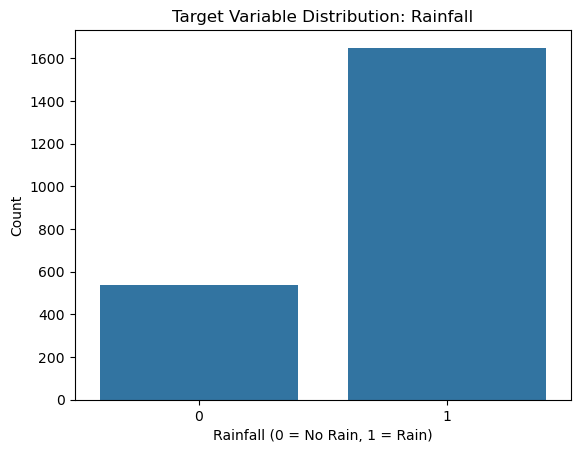

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 205.4 KB
None
                id          day     pressure      maxtemp  temparature  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean   1094.500000   179.948402  1013.602146    26.365799    23.953059 

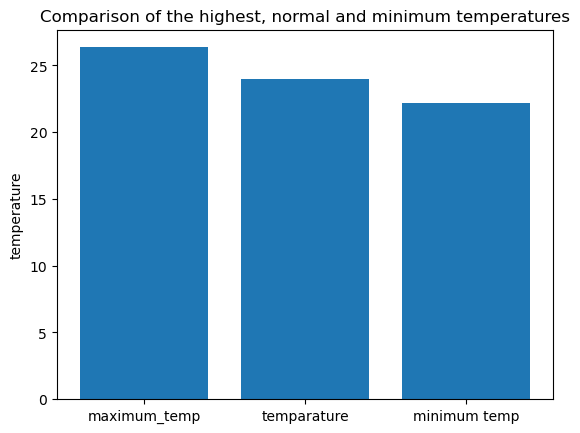

In [32]:
df_eda = pd.read_csv('./Data/train.csv')
sns.countplot(x='rainfall', data=df_eda)
plt.title("Target Variable Distribution: Rainfall")
plt.xlabel("Rainfall (0 = No Rain, 1 = Rain)")
plt.ylabel("Count")
plt.show()

# Temperature comparison and statistical test
x = ('maximum_temp','temparature','minimum temp')
y = (df_train['maxtemp'].mean(),
     df_train['temparature'].mean(),
     df_train['mintemp'].mean())
fig,ax = plt.subplots()
ax.bar(x,y)
ax.set_ylabel('temperature')
ax.set_title('Comparison of the highest, normal and minimum temperatures');


from scipy.stats import f_oneway

def Decision(test_results):
    if test_results[1] > 0.05:
        return f'''We fail to reject the null hypothesis,
        since p:{test_results[1]} is greater than 0.05.
        There is no significant difference in the sample means'''
    else:
        return f'''We reject the null hypothesis,
        since p:{test_results[1]} is less than 0.05.
        There is a significant difference in the sample means'''

anovatest_results = f_oneway(df_train['maxtemp'],
                             df_train['temparature'],
                             df_train['mintemp'])
Decision(anovatest_results)

# Check data types
print(df_train.info())

# Summary statistics
print(df_train.describe())

# Check for missing values
print("Missing in Train:\n", df_train.isnull().sum())
print("Missing in Test:\n", df_test.isnull().sum())


### 🔄 Step 3: Data Cleaning & EDA - Summary
**📌 What Happened?**  
Visualized target distribution and checked for missing values.  
**📊 Key Output:**  
Imbalance observed in rainfall classes; no missing values in train, 1 in test.  
**💡 Why It Matters?**  
Class imbalance affects model training. Null values can cause model failures if not handled.

### 🔄 Step 3a: Dataset Summary & Null Check - Summary
**📌 What Happened?**  
Inspected data types, descriptive statistics, and null values for both training and test datasets.  
**📊 Key Output:**  
- Confirmed numeric types for all columns.
- No missing values in train set; 1 null in test set.
**💡 Why It Matters?**  
Ensures the data is ready for modeling and alerts us to any preprocessing needs.

In [16]:
import os
print(os.listdir())


['Final_Capstone.ipynb', '.DS_Store', 'Capstone.ipynb', 'README.md', '.gitignore', '.git', 'Data', 'Notebooks']


In [19]:
import pandas as pd
import sys
sys.path.append('./Notebooks')

from Preprocessing import build_preprocessing_pipeline, save_pipeline


# 1. Load datasets
train_path = './Data/train.csv'
test_path = './Data/test.csv'
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

# 2. Separate target
target = df_train['rainfall']
df_train.drop(columns=['rainfall'], inplace=True)

# 3. Define features
numeric_features = ['windspeed', 'temparature', 'maxtemp', 'mintemp', 'humidity']
categorical_features = ['winddirection']

# 4. Build pipeline
pipeline = build_preprocessing_pipeline(numeric_features, categorical_features)

# 5. Fit on train data
df_train_transformed = pipeline.fit_transform(df_train)

# 6. Transform test data
df_test_transformed = pipeline.transform(df_test)

# 7. Save the pipeline
save_pipeline(pipeline, 'full_preprocessing_pipeline.joblib')

# 8. Validation
print(f"Train transformed shape: {df_train_transformed.shape}")
print(f"Test transformed shape: {df_test_transformed.shape}")
print("✅ Validation successful and pipeline saved!")


Train transformed shape: (2190, 48)
Test transformed shape: (730, 48)
✅ Validation successful and pipeline saved!
